In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

In [3]:
# 데이터 로드
data = pd.read_csv("F:/kdt jupyter/Project/Data/continuous_factory_process.csv")

# copy 생성
df = data.copy()
df.head(3)

# time_stamp 데이터 타입 string -> timestamp
df["time_stamp"] = pd.to_datetime(df["time_stamp"])

,time_stamp,AmbientConditions.AmbientHumidity.U.Actual,AmbientConditions.AmbientTemperature.U.Actual,Machine1.RawMaterial.Property1,Machine1.RawMaterial.Property2,Machine1.RawMaterial.Property3,Machine1.RawMaterial.Property4,Machine1.RawMaterialFeederParameter.U.Actual,Machine1.Zone1Temperature.C.Actual,Machine1.Zone2Temperature.C.Actual,...,Stage2.Output.Measurement10.U.Actual,Stage2.Output.Measurement10.U.Setpoint,Stage2.Output.Measurement11.U.Actual,Stage2.Output.Measurement11.U.Setpoint,Stage2.Output.Measurement12.U.Actual,Stage2.Output.Measurement12.U.Setpoint,Stage2.Output.Measurement13.U.Actual,Stage2.Output.Measurement13.U.Setpoint,Stage2.Output.Measurement14.U.Actual,Stage2.Output.Measurement14.U.Setpoint
0,2019-03-06 10:52:33,17.24,23.53,11.54,200,963.0,247,1241.26,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
1,2019-03-06 10:52:34,17.24,23.53,11.54,200,963.0,247,1246.09,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71
2,2019-03-06 10:52:35,17.24,23.53,11.54,200,963.0,247,1246.29,72.0,72.3,...,0.0,7.93,0.0,5.65,0.0,1.85,0.0,2.89,0.0,11.71


##### 9655 ~ 9680 이상치 인덱스 제거

In [6]:
df = pd.concat([df[:9655], df[9681:]])

## Stage1 output0

In [7]:
df0 = df.copy()

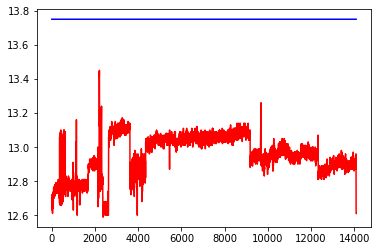

In [8]:
# output 값 12.58 보다 작은 데이터 제거
plt.plot(df0["Stage1.Output.Measurement0.U.Actual"].loc[df0["Stage1.Output.Measurement0.U.Actual"] > 12.58], "r")
plt.plot(df0["Stage1.Output.Measurement0.U.Setpoint"].loc[df0["Stage1.Output.Measurement0.U.Actual"] > 12.58], "b")

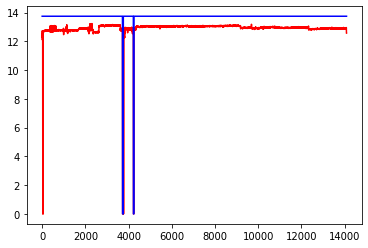

In [9]:
# output 값 13.25 보다 큰 데이터 제거
plt.plot(df0["Stage1.Output.Measurement0.U.Actual"].loc[df0["Stage1.Output.Measurement0.U.Actual"] < 13.25], "r")
plt.plot(df0["Stage1.Output.Measurement0.U.Setpoint"].loc[df0["Stage1.Output.Measurement0.U.Actual"] < 13.25], "b")

In [10]:
# 이상치 제거 데이터 생성
df0_reduced = df0.loc[(df0["Stage1.Output.Measurement0.U.Actual"] > 12.58) & (df0["Stage1.Output.Measurement0.U.Actual"] < 13.25)]

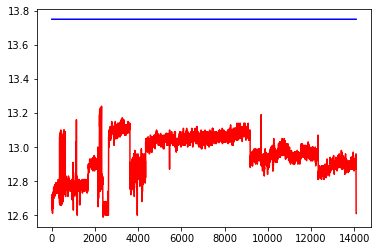

In [11]:
plt.plot(df0_reduced["Stage1.Output.Measurement0.U.Actual"], "r")
plt.plot(df0_reduced["Stage1.Output.Measurement0.U.Setpoint"], "b")

##### reset_index

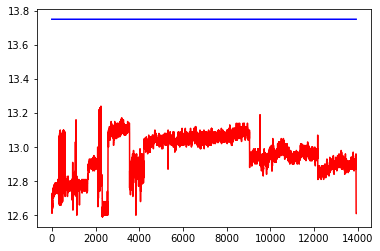

In [13]:
plt.plot(df0_reduced.reset_index(drop = True)["Stage1.Output.Measurement0.U.Actual"], "r")
plt.plot(df0_reduced.reset_index(drop = True)["Stage1.Output.Measurement0.U.Setpoint"], "b")

##### csv 파일 추출

In [23]:
df0_indexed = df0_reduced.reset_index(drop = True)
df0_indexed.to_csv("F:\\kdt jupyter\\Project\\Data\\df0_indexed.csv", index = False)

## Stage1 output1

In [24]:
df1 = df.copy()

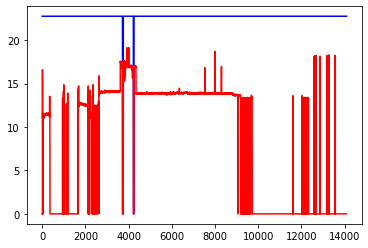

In [25]:
plt.plot(df1["Stage1.Output.Measurement1.U.Setpoint"], "b")
plt.plot(df1["Stage1.Output.Measurement1.U.Actual"], "r")

In [26]:
# 인덱스 357 ~ 1649, 9719 이후 이상치들 제거
df1 = pd.concat([df1[:357], df1[1650:9693]])

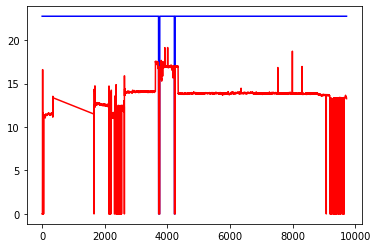

In [27]:
plt.plot(df1["Stage1.Output.Measurement1.U.Setpoint"], "b")
plt.plot(df1["Stage1.Output.Measurement1.U.Actual"], "r")

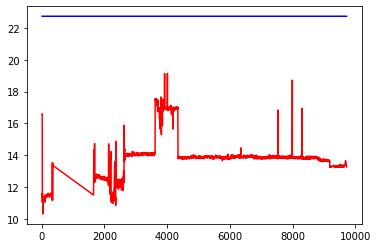

In [28]:
# output 값 0 데이터 제거
plt.plot(df1["Stage1.Output.Measurement1.U.Actual"].loc[df1["Stage1.Output.Measurement1.U.Actual"] > 0.01], "r")
plt.plot(df1["Stage1.Output.Measurement1.U.Setpoint"].loc[df1["Stage1.Output.Measurement1.U.Actual"] > 0.01], "b")

In [29]:
# 이상치 제거 데이터 생성
df1_reduced = df1.loc[df1["Stage1.Output.Measurement1.U.Actual"] > 0.01]

##### csv 파일 추출

In [37]:
df1_indexed = df1_reduced.reset_index(drop = True)
df1_indexed.to_csv("F:\\kdt jupyter\\Project\\Data\\df1_indexed.csv", index = False)

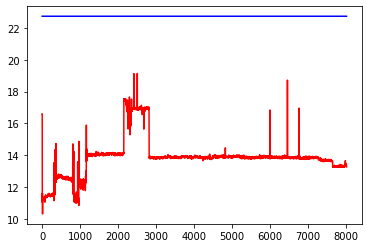

In [56]:
plt.plot(df1_indexed["Stage1.Output.Measurement1.U.Actual"], "r")
plt.plot(df1_indexed["Stage1.Output.Measurement1.U.Setpoint"], "b")

### X, y 분할

In [ ]:
X1, y1 = df1_reduced.iloc[:, :42], df1_reduced.iloc[:, 44:46]
y1.head(3)

In [ ]:
X1_reduced = X1.copy()
X1_reduced.drop(drop_rows,
              axis = 1, inplace = True)
X1_reduced

## Stage1 output2

In [31]:
df2 = df.copy()

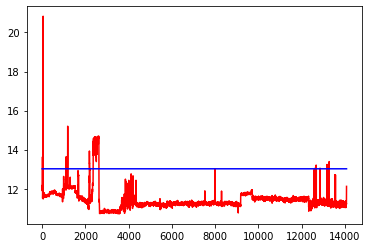

In [32]:
# output 값 10.5 보다 작은 데이터 제거
plt.plot(df2["Stage1.Output.Measurement2.U.Actual"].loc[df2["Stage1.Output.Measurement2.U.Actual"] > 10.5], "r")
plt.plot(df2["Stage1.Output.Measurement2.U.Setpoint"].loc[df2["Stage1.Output.Measurement2.U.Actual"] > 10.5], "b")

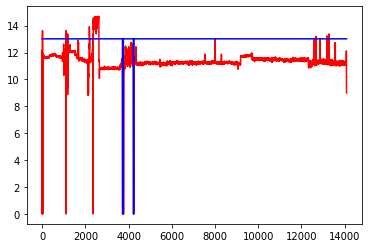

In [33]:
# output 값 15 보다 큰 데이터 제거
plt.plot(df2["Stage1.Output.Measurement2.U.Actual"].loc[df2["Stage1.Output.Measurement2.U.Actual"] < 15], "r")
plt.plot(df2["Stage1.Output.Measurement2.U.Setpoint"].loc[df2["Stage1.Output.Measurement2.U.Actual"] < 15], "b")

In [34]:
# 이상치 제거 데이터 생성
df2_reduced = df2.loc[(df2["Stage1.Output.Measurement2.U.Actual"] > 10.5) & (df2["Stage1.Output.Measurement2.U.Actual"] < 15)]

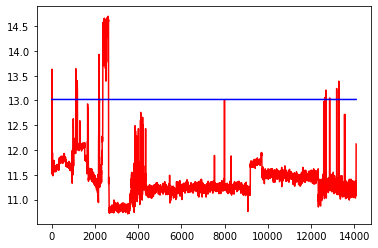

In [35]:
plt.plot(df2_reduced["Stage1.Output.Measurement2.U.Actual"], "r")
plt.plot(df2_reduced["Stage1.Output.Measurement2.U.Setpoint"], "b")

##### csv 파일 추출

In [36]:
df2_indexed = df2_reduced.reset_index(drop = True)
df2_indexed.to_csv("F:\\kdt jupyter\\Project\\Data\\df2_indexed.csv", index = False)

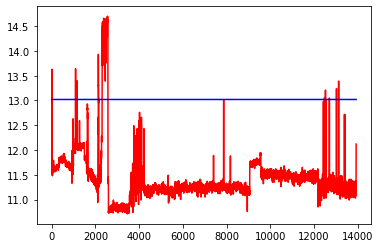

In [57]:
plt.plot(df2_indexed["Stage1.Output.Measurement2.U.Actual"], "r")
plt.plot(df2_indexed["Stage1.Output.Measurement2.U.Setpoint"], "b")

### X, y 분할

In [ ]:
X2, y2 = df2_reduced.iloc[:, :42], df2_reduced.iloc[:, 46:48]
y2.head(3)

In [ ]:
X2_reduced = X2.copy()
X2_reduced.drop(drop_rows,
              axis = 1, inplace = True)
X2_reduced

## Stage1 output3

In [38]:
df3 = df.copy()

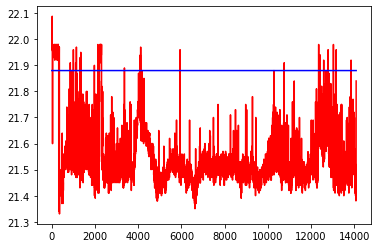

In [39]:
# output 값 5 보다 작은 데이터 제거
plt.plot(df3["Stage1.Output.Measurement3.U.Actual"].loc[df3["Stage1.Output.Measurement3.U.Actual"] > 21.3], "r")
plt.plot(df3["Stage1.Output.Measurement3.U.Setpoint"].loc[df3["Stage1.Output.Measurement3.U.Actual"] > 21.3], "b")

In [40]:
# 이상치 제거 데이터 생성
df3_reduced = df3.loc[df3["Stage1.Output.Measurement3.U.Actual"] > 21.3]

##### csv 파일 추출

In [41]:
df3_indexed = df3_reduced.reset_index(drop = True)
df3_indexed.to_csv("F:\\kdt jupyter\\Project\\Data\\df3_indexed.csv", index = False)

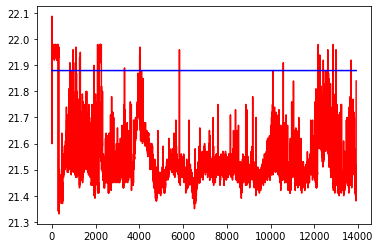

In [58]:
plt.plot(df3_indexed["Stage1.Output.Measurement3.U.Actual"], "r")
plt.plot(df3_indexed["Stage1.Output.Measurement3.U.Setpoint"], "b")

### X, y 분할

In [ ]:
X3, y3 = df3_reduced.iloc[:, :42], df3_reduced.iloc[:, 48:50]
y3.head(3)

In [ ]:
X3_reduced = X3.copy()
X3_reduced.drop(drop_rows,
              axis = 1, inplace = True)
X3_reduced

## Stage1 output4

In [42]:
df4 = df.copy()

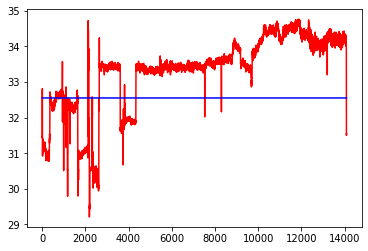

In [43]:
# output 값 5 보다 작은 데이터 제거
plt.plot(df4["Stage1.Output.Measurement4.U.Actual"].loc[df4["Stage1.Output.Measurement4.U.Actual"] > 5], "r")
plt.plot(df4["Stage1.Output.Measurement4.U.Setpoint"].loc[df4["Stage1.Output.Measurement4.U.Actual"] > 5], "b")

In [44]:
# 이상치 제거 데이터 생성
df4_reduced = df4.loc[df4["Stage1.Output.Measurement4.U.Actual"] > 5]

##### csv 파일 추출

In [45]:
df4_indexed = df4_reduced.reset_index(drop = True)
df4_indexed.to_csv("F:\\kdt jupyter\\Project\\Data\\df4_indexed.csv", index = False)

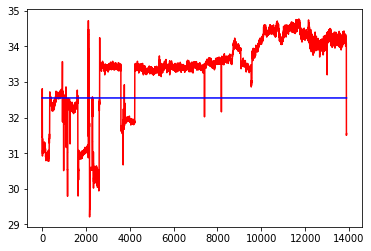

In [59]:
plt.plot(df4_indexed["Stage1.Output.Measurement4.U.Actual"], "r")
plt.plot(df4_indexed["Stage1.Output.Measurement4.U.Setpoint"], "b")

### X, y 분할

In [ ]:
X4, y4 = df4_reduced.iloc[:, :42], df4_reduced.iloc[:, 50:52]
y4.head(3)

In [ ]:
X4_reduced = X4.copy()
X4_reduced.drop(drop_rows,
              axis = 1, inplace = True)
X4_reduced

## Stage1 output5

In [60]:
df5 = df.copy()

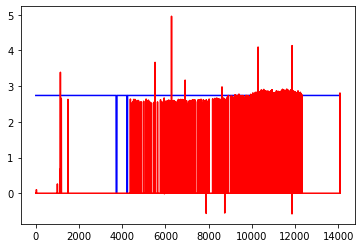

In [61]:
plt.plot(df5["Stage1.Output.Measurement5.U.Setpoint"], "b")
plt.plot(df5["Stage1.Output.Measurement5.U.Actual"], "r")

In [62]:
# 인덱스 4377 이전, 12310 이후 이상치들 제거
df5 = df5[4378:12284]

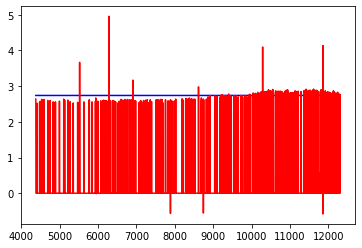

In [63]:
plt.plot(df5["Stage1.Output.Measurement5.U.Setpoint"], "b")
plt.plot(df5["Stage1.Output.Measurement5.U.Actual"], "r")

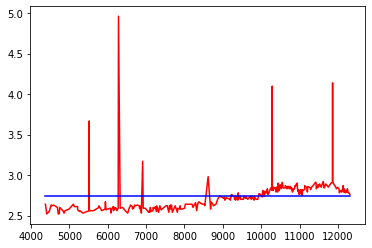

In [64]:
# output 값 2 보다 작은 데이터 제거
plt.plot(df5["Stage1.Output.Measurement5.U.Actual"].loc[df5["Stage1.Output.Measurement5.U.Actual"] > 2], "r")
plt.plot(df5["Stage1.Output.Measurement5.U.Setpoint"].loc[df5["Stage1.Output.Measurement5.U.Actual"] > 2], "b")

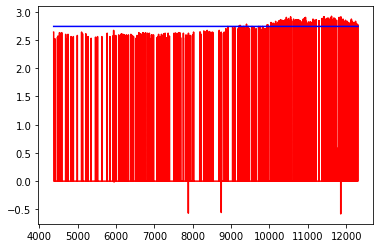

In [65]:
# output 값 2.97 보다 큰 데이터 제거
plt.plot(df5["Stage1.Output.Measurement5.U.Actual"].loc[df5["Stage1.Output.Measurement5.U.Actual"] < 2.97], "r")
plt.plot(df5["Stage1.Output.Measurement5.U.Setpoint"].loc[df5["Stage1.Output.Measurement5.U.Actual"] < 2.97], "b")

In [66]:
# 이상치 제거 데이터 생성
df5_reduced = df5.loc[(df5["Stage1.Output.Measurement5.U.Actual"] > 2) & (df5["Stage1.Output.Measurement5.U.Actual"] < 2.97)]

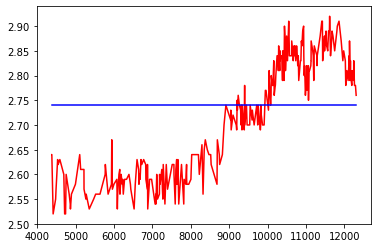

In [67]:
plt.plot(df5_reduced["Stage1.Output.Measurement5.U.Actual"], "r")
plt.plot(df5_reduced["Stage1.Output.Measurement5.U.Setpoint"], "b")

##### csv 파일 추출

In [68]:
df5_indexed = df5_reduced.reset_index(drop = True)
df5_indexed.to_csv("F:\\kdt jupyter\\Project\\Data\\df5_indexed.csv", index = False)

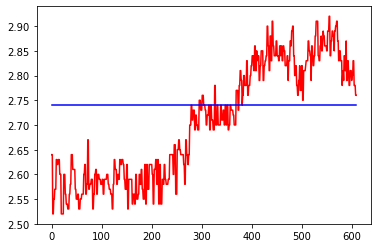

In [69]:
plt.plot(df5_indexed["Stage1.Output.Measurement5.U.Actual"], "r")
plt.plot(df5_indexed["Stage1.Output.Measurement5.U.Setpoint"], "b")

### X, y 분할

In [ ]:
X5, y5 = df5_reduced.iloc[:, :42], df5_reduced.iloc[:, 52:54]
y5.head(3)

In [ ]:
X5_reduced = X5.copy()
X5_reduced.drop(drop_rows,
              axis = 1, inplace = True)
X5_reduced

## Stage1 output6

In [70]:
df6 = df.copy()

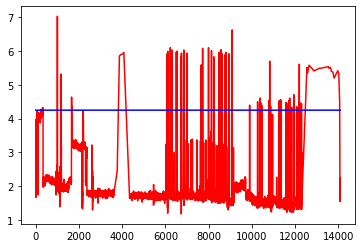

In [71]:
# output 값 1 보다 작은 데이터 제거
plt.plot(df6["Stage1.Output.Measurement6.U.Actual"].loc[df6["Stage1.Output.Measurement6.U.Actual"] > 1], "r")
plt.plot(df6["Stage1.Output.Measurement6.U.Setpoint"].loc[df6["Stage1.Output.Measurement6.U.Actual"] > 1], "b")

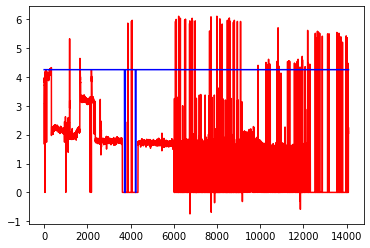

In [72]:
# output 값 6.5 보다 큰 데이터 제거
plt.plot(df6["Stage1.Output.Measurement6.U.Actual"].loc[df6["Stage1.Output.Measurement6.U.Actual"] < 6.5], "r")
plt.plot(df6["Stage1.Output.Measurement6.U.Setpoint"].loc[df6["Stage1.Output.Measurement6.U.Actual"] < 6.5], "b")

In [73]:
# 이상치 제거 데이터 생성
df6_reduced = df6.loc[(df6["Stage1.Output.Measurement6.U.Actual"] > 1) & (df6["Stage1.Output.Measurement6.U.Actual"] < 6.5)]

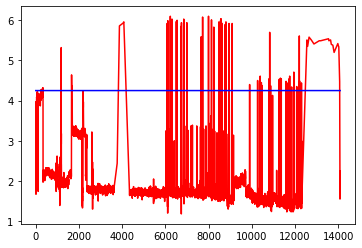

In [74]:
plt.plot(df6_reduced["Stage1.Output.Measurement6.U.Actual"], "r")
plt.plot(df6_reduced["Stage1.Output.Measurement6.U.Setpoint"], "b")

##### csv 파일 추출

In [75]:
df6_indexed = df6_reduced.reset_index(drop = True)
df6_indexed.to_csv("F:\\kdt jupyter\\Project\\Data\\df6_indexed.csv", index = False)

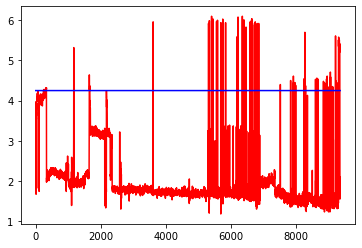

In [76]:
plt.plot(df6_indexed["Stage1.Output.Measurement6.U.Actual"], "r")
plt.plot(df6_indexed["Stage1.Output.Measurement6.U.Setpoint"], "b")

### X, y 분할

In [ ]:
X6, y6 = df6_reduced.iloc[:, :42], df6_reduced.iloc[:, 54:56]
y6.head(3)

In [ ]:
X6_reduced = X6.copy()
X6_reduced.drop(drop_rows,
              axis = 1, inplace = True)
X6_reduced

## Stage1 output7

In [77]:
df7 = df.copy()

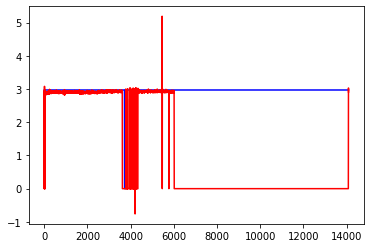

In [78]:
plt.plot(df7["Stage1.Output.Measurement7.U.Setpoint"], "b")
plt.plot(df7["Stage1.Output.Measurement7.U.Actual"], "r")

In [79]:
# 인덱스 6015 이후 이상치들 제거
df7 = df7[:6015]

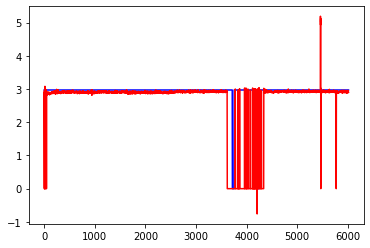

In [80]:
plt.plot(df7["Stage1.Output.Measurement7.U.Setpoint"], "b")
plt.plot(df7["Stage1.Output.Measurement7.U.Actual"], "r")

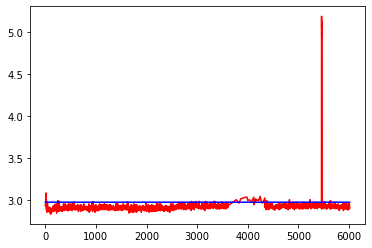

In [81]:
# output 값 2.82 보다 작은 데이터 제거
plt.plot(df7["Stage1.Output.Measurement7.U.Actual"].loc[df7["Stage1.Output.Measurement7.U.Actual"] > 2.82], "r")
plt.plot(df7["Stage1.Output.Measurement7.U.Setpoint"].loc[df7["Stage1.Output.Measurement7.U.Actual"] > 2.82], "b")

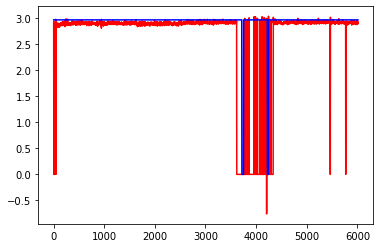

In [82]:
# output 값 3.05 보다 큰 데이터 제거
plt.plot(df7["Stage1.Output.Measurement7.U.Actual"].loc[df7["Stage1.Output.Measurement7.U.Actual"] < 3.05], "r")
plt.plot(df7["Stage1.Output.Measurement7.U.Setpoint"].loc[df7["Stage1.Output.Measurement7.U.Actual"] < 3.05], "b")

In [83]:
# 이상치 제거 데이터 생성
df7_reduced = df7.loc[(df7["Stage1.Output.Measurement7.U.Actual"] > 2.82) & (df7["Stage1.Output.Measurement7.U.Actual"] < 3.05)]

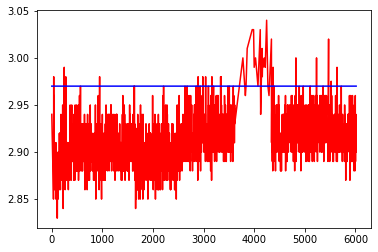

In [84]:
plt.plot(df7_reduced["Stage1.Output.Measurement7.U.Actual"], "r")
plt.plot(df7_reduced["Stage1.Output.Measurement7.U.Setpoint"], "b")

##### csv 파일 추출

In [85]:
df7_indexed = df7_reduced.reset_index(drop = True)
df7_indexed.to_csv("F:\\kdt jupyter\\Project\\Data\\df7_indexed.csv", index = False)

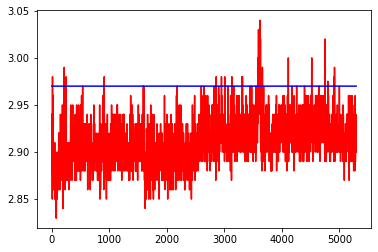

In [86]:
plt.plot(df7_indexed["Stage1.Output.Measurement7.U.Actual"], "r")
plt.plot(df7_indexed["Stage1.Output.Measurement7.U.Setpoint"], "b")

### X, y 분할

In [ ]:
X7, y7 = df7_reduced.iloc[:, :42], df7_reduced.iloc[:, 56:58]
y7.head(3)

In [ ]:
X7_reduced = X7.copy()
X7_reduced.drop(drop_rows,
              axis = 1, inplace = True)
X7_reduced

## Stage1 output8

In [87]:
df8 = df.copy()

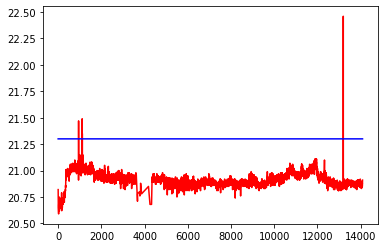

In [88]:
# output 값 20.57 보다 작은 데이터 제거
plt.plot(df8["Stage1.Output.Measurement8.U.Actual"].loc[df8["Stage1.Output.Measurement8.U.Actual"] > 20.57], "r")
plt.plot(df8["Stage1.Output.Measurement8.U.Setpoint"].loc[df8["Stage1.Output.Measurement8.U.Actual"] > 20.57], "b")

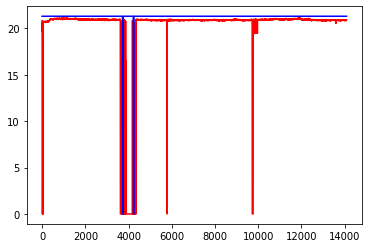

In [89]:
# output 값 21.4 보다 큰 데이터 제거
plt.plot(df8["Stage1.Output.Measurement8.U.Actual"].loc[df8["Stage1.Output.Measurement8.U.Actual"] < 21.2], "r")
plt.plot(df8["Stage1.Output.Measurement8.U.Setpoint"].loc[df8["Stage1.Output.Measurement8.U.Actual"] < 21.4], "b")

In [90]:
# 이상치 제거 데이터 생성
df8_reduced = df8.loc[(df8["Stage1.Output.Measurement8.U.Actual"] > 20.57) & (df8["Stage1.Output.Measurement8.U.Actual"] < 21.2)]

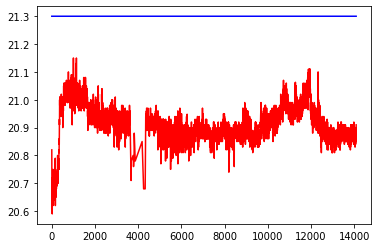

In [91]:
plt.plot(df8_reduced["Stage1.Output.Measurement8.U.Actual"], "r")
plt.plot(df8_reduced["Stage1.Output.Measurement8.U.Setpoint"], "b")

##### csv 파일 추출

In [92]:
df8_indexed = df8_reduced.reset_index(drop = True)
df8_indexed.to_csv("F:\\kdt jupyter\\Project\\Data\\df8_indexed.csv", index = False)

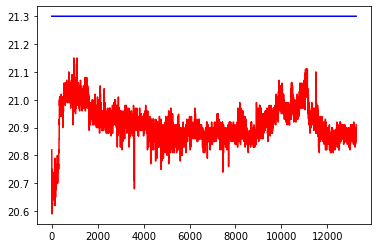

In [93]:
plt.plot(df8_indexed["Stage1.Output.Measurement8.U.Actual"], "r")
plt.plot(df8_indexed["Stage1.Output.Measurement8.U.Setpoint"], "b")

### X, y 분할

In [ ]:
X8, y8 = df8_reduced.iloc[:, :42], df8_reduced.iloc[:, 58:60]
y8.head(3)

In [ ]:
X8_reduced = X8.copy()
X8_reduced.drop(drop_rows,
              axis = 1, inplace = True)
X8_reduced

## Stage1 output9

In [94]:
df9 = df.copy()

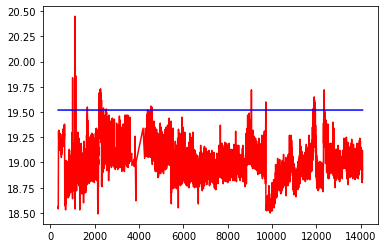

In [95]:
# output 값 18.45 보다 작은 데이터 제거
plt.plot(df9["Stage1.Output.Measurement9.U.Actual"].loc[df9["Stage1.Output.Measurement9.U.Actual"] > 18.45], "r")
plt.plot(df9["Stage1.Output.Measurement9.U.Setpoint"].loc[df9["Stage1.Output.Measurement9.U.Actual"] > 18.45], "b")

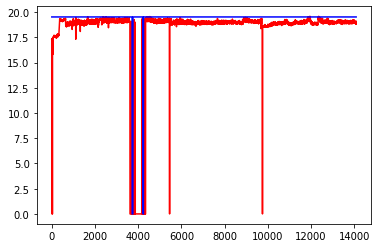

In [96]:
# output 값 19.6 보다 큰 데이터 제거
plt.plot(df9["Stage1.Output.Measurement9.U.Actual"].loc[df9["Stage1.Output.Measurement9.U.Actual"] < 19.6], "r")
plt.plot(df9["Stage1.Output.Measurement9.U.Setpoint"].loc[df9["Stage1.Output.Measurement9.U.Actual"] < 19.6], "b")

In [97]:
# 이상치 제거 데이터 생성
df9_reduced = df9.loc[(df9["Stage1.Output.Measurement9.U.Actual"] > 18.45) & (df9["Stage1.Output.Measurement9.U.Actual"] < 19.6)]

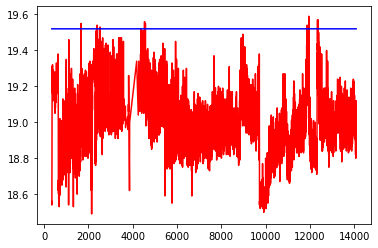

In [98]:
plt.plot(df9_reduced["Stage1.Output.Measurement9.U.Actual"], "r")
plt.plot(df9_reduced["Stage1.Output.Measurement9.U.Setpoint"], "b")

##### csv 파일 추출

In [99]:
df9_indexed = df9_reduced.reset_index(drop = True)
df9_indexed.to_csv("F:\\kdt jupyter\\Project\\Data\\df9_indexed.csv", index = False)

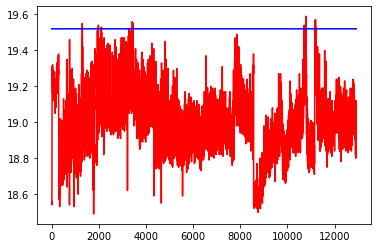

In [100]:
plt.plot(df9_indexed["Stage1.Output.Measurement9.U.Actual"], "r")
plt.plot(df9_indexed["Stage1.Output.Measurement9.U.Setpoint"], "b")

### X, y 분할

In [ ]:
X9, y9 = df9_reduced.iloc[:, :42], df9_reduced.iloc[:, 60:62]
y9.head(3)

In [ ]:
X9_reduced = X9.copy()
X9_reduced.drop(drop_rows,
              axis = 1, inplace = True)
X9_reduced

## Stage1 output10

In [101]:
df10 = df.copy()

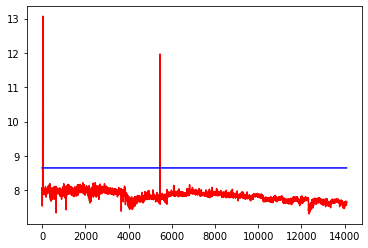

In [106]:
# output 값 7.3 보다 작은 데이터 제거
plt.plot(df10["Stage1.Output.Measurement10.U.Actual"].loc[df10["Stage1.Output.Measurement10.U.Actual"] > 7.3], "r")
plt.plot(df10["Stage1.Output.Measurement10.U.Setpoint"].loc[df10["Stage1.Output.Measurement10.U.Actual"] > 7.3], "b")

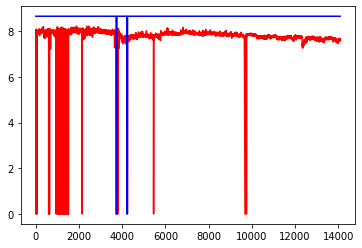

In [103]:
# output 값 10보다 큰 데이터 제거
plt.plot(df10["Stage1.Output.Measurement10.U.Actual"].loc[df10["Stage1.Output.Measurement10.U.Actual"] < 10], "r")
plt.plot(df10["Stage1.Output.Measurement10.U.Setpoint"].loc[df10["Stage1.Output.Measurement10.U.Actual"] < 10], "b")

In [107]:
# 이상치 제거 데이터 생성
df10_reduced = df10.loc[(df10["Stage1.Output.Measurement10.U.Actual"] > 7.3) & (df10["Stage1.Output.Measurement10.U.Actual"] < 10)]

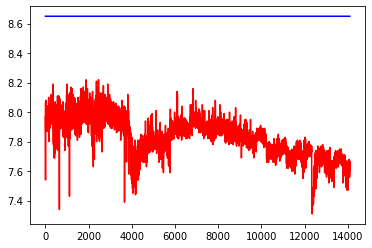

In [108]:
plt.plot(df10_reduced["Stage1.Output.Measurement10.U.Actual"], "r")
plt.plot(df10_reduced["Stage1.Output.Measurement10.U.Setpoint"], "b")

##### csv 파일 추출

In [110]:
df10_indexed = df10_reduced.reset_index(drop = True)
df10_indexed.to_csv("F:\\kdt jupyter\\Project\\Data\\df10_indexed.csv", index = False)

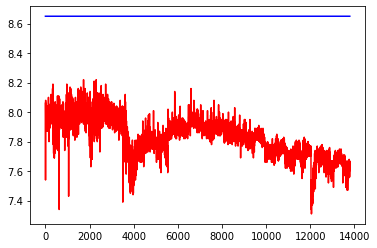

In [111]:
plt.plot(df10_indexed["Stage1.Output.Measurement10.U.Actual"], "r")
plt.plot(df10_indexed["Stage1.Output.Measurement10.U.Setpoint"], "b")

### X, y 분할

In [ ]:
X10, y10 = df10_reduced.iloc[:, :42], df10_reduced.iloc[:, 62:64]
y10.head(3)

In [ ]:
X10_reduced = X10.copy()
X10_reduced.drop(drop_rows,
              axis = 1, inplace = True)
X10_reduced

## Stage1 output11

In [112]:
df11 = df.copy()

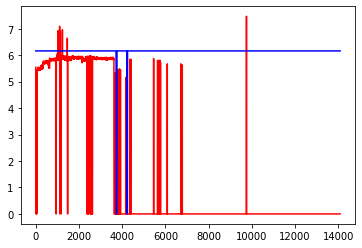

In [113]:
# 첫 번째 Setpoint 이후로는 거의 0값
plt.plot(df11["Stage1.Output.Measurement11.U.Actual"], "r")
plt.plot(df11["Stage1.Output.Measurement11.U.Setpoint"], "b")

In [114]:
# 첫 번째 Setpoint 이후 데이터 삭제
df11["Stage1.Output.Measurement11.U.Actual"][3614:3618]
df11 = df11[:3616]

3614    5.87
3615    5.85
3616    0.00
3617    0.00
Name: Stage1.Output.Measurement11.U.Actual, dtype: float64

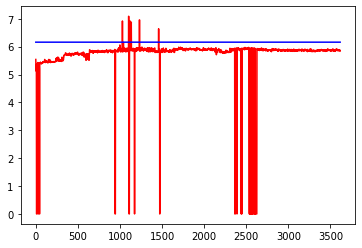

In [115]:
plt.plot(df11["Stage1.Output.Measurement11.U.Actual"], "r")
plt.plot(df11["Stage1.Output.Measurement11.U.Setpoint"], "b")

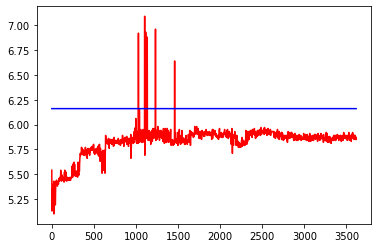

In [116]:
# output 값 4 보다 작은 데이터 제거
plt.plot(df11["Stage1.Output.Measurement11.U.Actual"].loc[df11["Stage1.Output.Measurement11.U.Actual"] > 4], "r")
plt.plot(df11["Stage1.Output.Measurement11.U.Setpoint"].loc[df11["Stage1.Output.Measurement11.U.Actual"] > 4], "b")

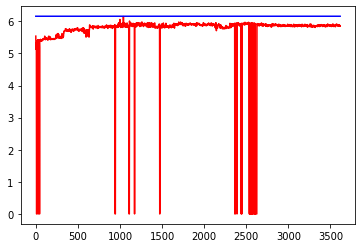

In [117]:
# output 값 6.5보다 큰 데이터 제거
plt.plot(df11["Stage1.Output.Measurement11.U.Actual"].loc[df11["Stage1.Output.Measurement11.U.Actual"] < 6.5], "r")
plt.plot(df11["Stage1.Output.Measurement11.U.Setpoint"].loc[df11["Stage1.Output.Measurement11.U.Actual"] < 6.5], "b")

In [118]:
# 이상치 제거 데이터 생성
df11_reduced = df11.loc[(df11["Stage1.Output.Measurement11.U.Actual"] > 4) & (df11["Stage1.Output.Measurement11.U.Actual"] < 6.5)]

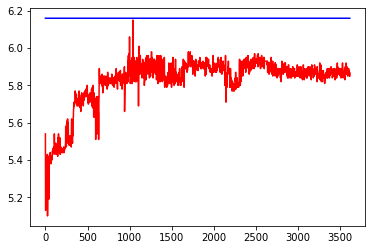

In [119]:
plt.plot(df11_reduced["Stage1.Output.Measurement11.U.Actual"], "r")
plt.plot(df11_reduced["Stage1.Output.Measurement11.U.Setpoint"], "b")

##### csv 파일 추출

In [120]:
df11_indexed = df11_reduced.reset_index(drop = True)
df11_indexed.to_csv("F:\\kdt jupyter\\Project\\Data\\df11_indexed.csv", index = False)

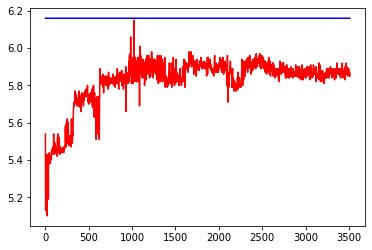

In [121]:
plt.plot(df11_indexed["Stage1.Output.Measurement11.U.Actual"], "r")
plt.plot(df11_indexed["Stage1.Output.Measurement11.U.Setpoint"], "b")

### X, y 분할

In [ ]:
X11, y11 = df11_reduced.iloc[:, :42], df11_reduced.iloc[:, 64:66]
y11.head(3)

In [ ]:
X11_reduced = X11.copy()
X11_reduced.drop(drop_rows,
              axis = 1, inplace = True)
X11_reduced

## Stage1 output12

In [122]:
df12 = df.copy()

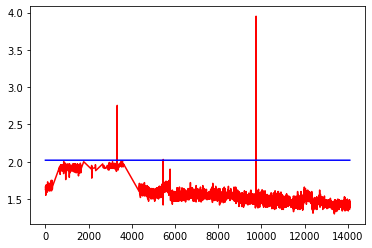

In [123]:
# output 값 1.15보다 작은 데이터 제거
plt.plot(df12["Stage1.Output.Measurement12.U.Actual"].loc[df12["Stage1.Output.Measurement12.U.Actual"] > 1.15], "r")
plt.plot(df12["Stage1.Output.Measurement12.U.Setpoint"].loc[df12["Stage1.Output.Measurement12.U.Actual"] > 1.15], "b")

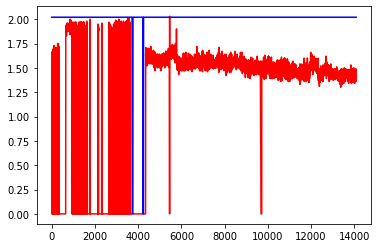

In [124]:
# output 값 2.5보다 큰 데이터 제거
plt.plot(df12["Stage1.Output.Measurement12.U.Actual"].loc[df12["Stage1.Output.Measurement12.U.Actual"] < 2.5], "r")
plt.plot(df12["Stage1.Output.Measurement12.U.Setpoint"].loc[df12["Stage1.Output.Measurement12.U.Actual"] < 2.5], "b")

In [125]:
# 이상치 제거 데이터 생성
df12_reduced = df12.loc[(df12["Stage1.Output.Measurement12.U.Actual"] > 1.15) & (df12["Stage1.Output.Measurement12.U.Actual"] < 2.5)]

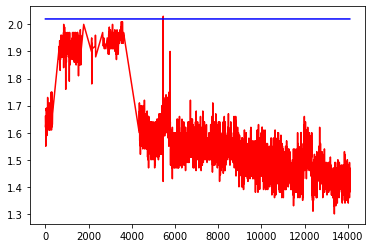

In [126]:
plt.plot(df12_reduced["Stage1.Output.Measurement12.U.Actual"], "r")
plt.plot(df12_reduced["Stage1.Output.Measurement12.U.Setpoint"], "b")

##### csv 파일 추출

In [127]:
df12_indexed = df12_reduced.reset_index(drop = True)
df12_indexed.to_csv("F:\\kdt jupyter\\Project\\Data\\df12_indexed.csv", index = False)

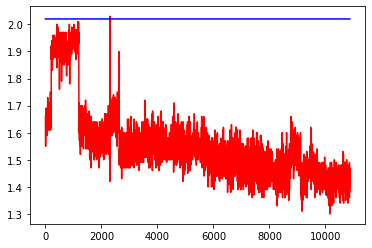

In [128]:
plt.plot(df12_indexed["Stage1.Output.Measurement12.U.Actual"], "r")
plt.plot(df12_indexed["Stage1.Output.Measurement12.U.Setpoint"], "b")

### X, y 분할

In [ ]:
X12, y12 = df12_reduced.iloc[:, :42], df12_reduced.iloc[:, 66:68]
y12.head(3)

In [ ]:
X12_reduced = X12.copy()
X12_reduced.drop(drop_rows,
              axis = 1, inplace = True)
X12_reduced

## Stage1 output13

In [129]:
df13 = df.copy()

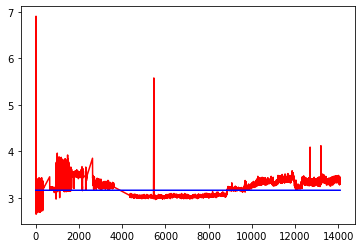

In [130]:
# output 값 2보다 작은 데이터 제거
plt.plot(df13["Stage1.Output.Measurement13.U.Actual"].loc[df13["Stage1.Output.Measurement13.U.Actual"] > 2], "r")
plt.plot(df13["Stage1.Output.Measurement13.U.Setpoint"].loc[df13["Stage1.Output.Measurement13.U.Actual"] > 2], "b")

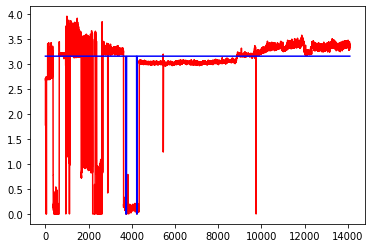

In [131]:
# output 값 4보다 큰 데이터 제거
plt.plot(df13["Stage1.Output.Measurement13.U.Actual"].loc[df13["Stage1.Output.Measurement13.U.Actual"] < 4], "r")
plt.plot(df13["Stage1.Output.Measurement13.U.Setpoint"].loc[df13["Stage1.Output.Measurement13.U.Actual"] < 4], "b")

In [132]:
# 이상치 제거 데이터 생성
df13_reduced = df13.loc[(df13["Stage1.Output.Measurement13.U.Actual"] > 2) & (df13["Stage1.Output.Measurement13.U.Actual"] < 4)]

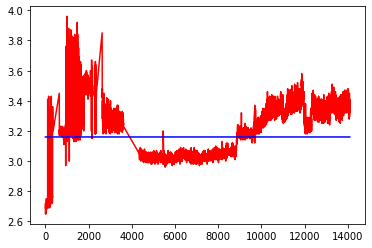

In [133]:
plt.plot(df13_reduced["Stage1.Output.Measurement13.U.Actual"], "r")
plt.plot(df13_reduced["Stage1.Output.Measurement13.U.Setpoint"], "b")

##### csv 파일 추출

In [134]:
df13_indexed = df13_reduced.reset_index(drop = True)
df13_indexed.to_csv("F:\\kdt jupyter\\Project\\Data\\df13_indexed.csv", index = False)

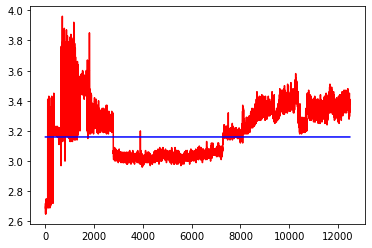

In [135]:
plt.plot(df13_indexed["Stage1.Output.Measurement13.U.Actual"], "r")
plt.plot(df13_indexed["Stage1.Output.Measurement13.U.Setpoint"], "b")

### X, y 분할

In [ ]:
X13, y13 = df13_reduced.iloc[:, :42], df13_reduced.iloc[:, 68:70]
y13.head(3)

In [ ]:
X13_reduced = X13.copy()
X13_reduced.drop(drop_rows,
              axis = 1, inplace = True)
X13_reduced

## Stage1 output14

In [136]:
df14 = df.copy()

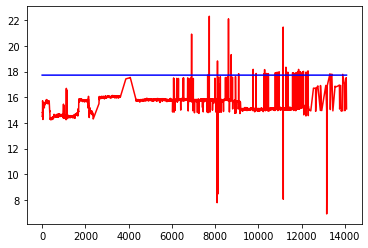

In [137]:
# output 값 1보다 작은 데이터 제거
plt.plot(df14["Stage1.Output.Measurement14.U.Actual"].loc[df14["Stage1.Output.Measurement14.U.Actual"] > 1], "r")
plt.plot(df14["Stage1.Output.Measurement14.U.Setpoint"].loc[df14["Stage1.Output.Measurement14.U.Actual"] > 1], "b")

##### 20보다 큰이상치 인덱스 검색

In [138]:
df14["Stage1.Output.Measurement14.U.Actual"].loc[df14["Stage1.Output.Measurement14.U.Actual"] > 20]

6911     20.910000
6912     20.910000
7730     22.301788
8617     22.100000
8618     22.100000
11148    21.457282
Name: Stage1.Output.Measurement14.U.Actual, dtype: float64

In [139]:
df14["Stage1.Output.Measurement14.U.Actual"][6908:6915]

6908     0.00
6909     0.00
6910     0.00
6911    20.91
6912    20.91
6913    15.77
6914    15.77
Name: Stage1.Output.Measurement14.U.Actual, dtype: float64

In [140]:
df14["Stage1.Output.Measurement14.U.Actual"][7727:7733]

7727     0.000000
7728     0.000000
7729    15.750000
7730    22.301788
7731    15.750000
7732     0.000000
Name: Stage1.Output.Measurement14.U.Actual, dtype: float64

In [141]:
df14["Stage1.Output.Measurement14.U.Actual"][8614:8621]

8614    15.78
8615    15.78
8616    15.78
8617    22.10
8618    22.10
8619     0.00
8620     0.00
Name: Stage1.Output.Measurement14.U.Actual, dtype: float64

In [142]:
df14["Stage1.Output.Measurement14.U.Actual"][11145:11151]

11171    15.06
11172    15.10
11173    15.10
11174    15.05
11175    15.07
11176    15.06
Name: Stage1.Output.Measurement14.U.Actual, dtype: float64

##### 20보다 큰 인덱스들도 삭제

##### 10보다 작은 이상치 인덱스 검색

In [143]:
df14["Stage1.Output.Measurement14.U.Actual"].loc[(df14["Stage1.Output.Measurement14.U.Actual"] < 10) & (df14["Stage1.Output.Measurement14.U.Actual"] > 6)]

8093     7.794189
8127     8.470173
11152    8.062649
13161    6.919961
Name: Stage1.Output.Measurement14.U.Actual, dtype: float64

In [144]:
df14["Stage1.Output.Measurement14.U.Actual"][8090:8097]

8090     0.000000
8091     0.000000
8092     0.000000
8093     7.794189
8094    15.740000
8095    15.900000
8096    14.820000
Name: Stage1.Output.Measurement14.U.Actual, dtype: float64

In [145]:
df14["Stage1.Output.Measurement14.U.Actual"][8124:8131]

8124    15.760000
8125     0.000000
8126     0.000000
8127     8.470173
8128    15.820000
8129    15.820000
8130    15.820000
Name: Stage1.Output.Measurement14.U.Actual, dtype: float64

In [146]:
df14["Stage1.Output.Measurement14.U.Actual"][11149:11156]

11175    15.07
11176    15.06
11177    15.06
11178    15.06
11179    15.06
11180    15.03
11181     0.00
Name: Stage1.Output.Measurement14.U.Actual, dtype: float64

In [147]:
df14["Stage1.Output.Measurement14.U.Actual"][13158:13165]

13184     0.00
13185    16.91
13186    16.91
13187    16.91
13188     0.00
13189     0.00
13190     0.00
Name: Stage1.Output.Measurement14.U.Actual, dtype: float64

##### 이상치인 0으로 오거나 가는 과정에서 나타난 것으로 보임

##### 제거 가능할 듯

In [148]:
# 이상치 제거 데이터 생성
df14_reduced = df14.loc[(df14["Stage1.Output.Measurement14.U.Actual"] > 10) & (df14["Stage1.Output.Measurement14.U.Actual"] < 20)]

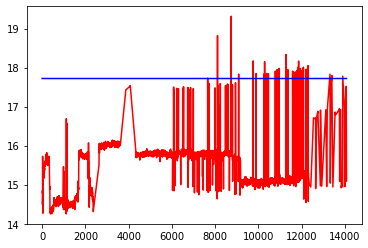

In [149]:
plt.plot(df14_reduced["Stage1.Output.Measurement14.U.Actual"], "r")
plt.plot(df14_reduced["Stage1.Output.Measurement14.U.Setpoint"], "b")

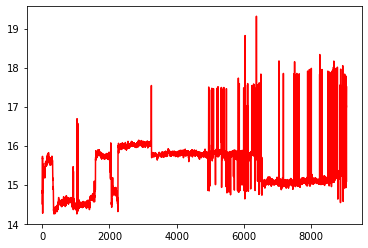

In [150]:
plt.plot(df14_reduced.reset_index(drop = True)["Stage1.Output.Measurement14.U.Actual"], "r")

##### csv 파일 추출

In [151]:
df14_indexed = df14_reduced.reset_index(drop = True)
df14_indexed.to_csv("F:\\kdt jupyter\\Project\\Data\\df14_indexed.csv", index = False)

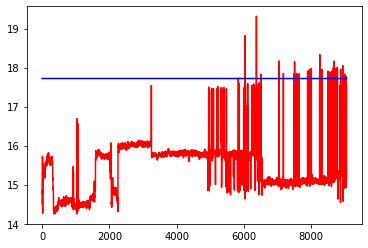

In [152]:
plt.plot(df14_indexed["Stage1.Output.Measurement14.U.Actual"], "r")
plt.plot(df14_indexed["Stage1.Output.Measurement14.U.Setpoint"], "b")

### X, y 분할

In [ ]:
X14, y14 = df14_reduced.iloc[:, :42], df1_reduced.iloc[:, 70:72]
y14.head(3)

In [ ]:
X14_reduced = X14.copy()
X14_reduced.drop(drop_rows,
              axis = 1, inplace = True)
X14_reduced

## 전처리 후 각 stage1 output plot

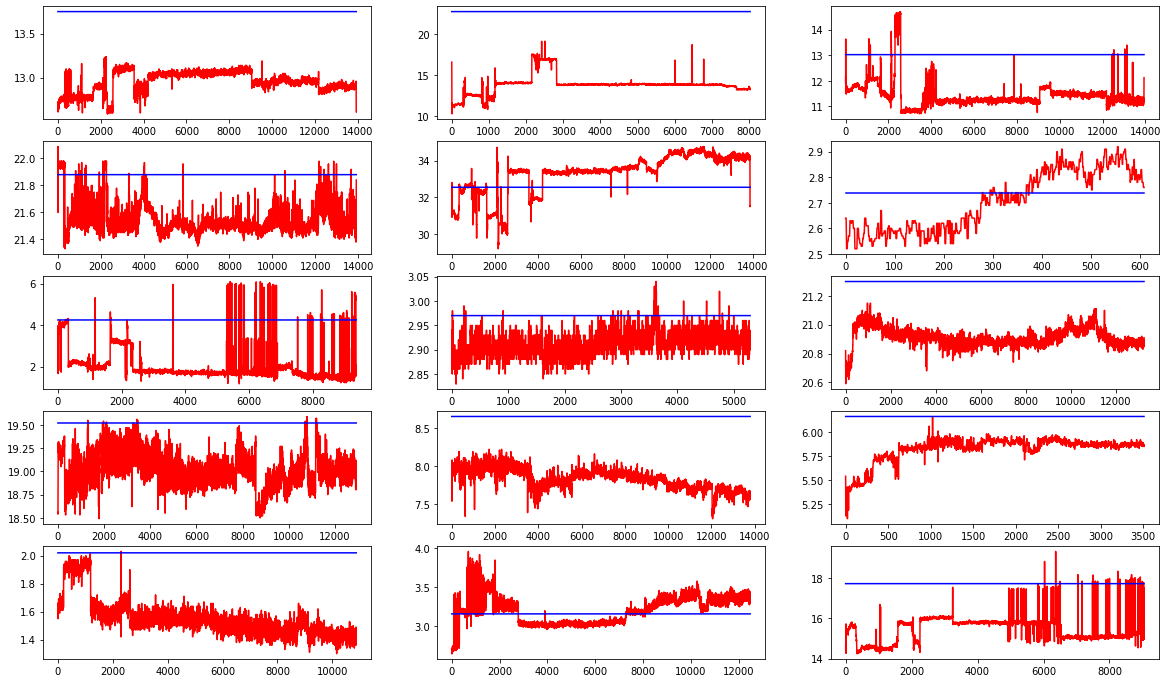

In [153]:
fig, ax = plt.subplots(5, 3, figsize = (20, 12))

ax[0, 0].plot(df0_indexed["Stage1.Output.Measurement0.U.Actual"], "r")
ax[0, 0].plot(df0_indexed["Stage1.Output.Measurement0.U.Setpoint"], "b")
ax[0, 1].plot(df1_indexed["Stage1.Output.Measurement1.U.Actual"], "r")
ax[0, 1].plot(df1_indexed["Stage1.Output.Measurement1.U.Setpoint"], "b")
ax[0, 2].plot(df2_indexed["Stage1.Output.Measurement2.U.Actual"], "r")
ax[0, 2].plot(df2_indexed["Stage1.Output.Measurement2.U.Setpoint"], "b")

ax[1, 0].plot(df3_indexed["Stage1.Output.Measurement3.U.Actual"], "r")
ax[1, 0].plot(df3_indexed["Stage1.Output.Measurement3.U.Setpoint"], "b")
ax[1, 1].plot(df4_indexed["Stage1.Output.Measurement4.U.Actual"], "r")
ax[1, 1].plot(df4_indexed["Stage1.Output.Measurement4.U.Setpoint"], "b")
ax[1, 2].plot(df5_indexed["Stage1.Output.Measurement5.U.Actual"], "r")
ax[1, 2].plot(df5_indexed["Stage1.Output.Measurement5.U.Setpoint"], "b")

ax[2, 0].plot(df6_indexed["Stage1.Output.Measurement6.U.Actual"], "r")
ax[2, 0].plot(df6_indexed["Stage1.Output.Measurement6.U.Setpoint"], "b")
ax[2, 1].plot(df7_indexed["Stage1.Output.Measurement7.U.Actual"], "r")
ax[2, 1].plot(df7_indexed["Stage1.Output.Measurement7.U.Setpoint"], "b")
ax[2, 2].plot(df8_indexed["Stage1.Output.Measurement8.U.Actual"], "r")
ax[2, 2].plot(df8_indexed["Stage1.Output.Measurement8.U.Setpoint"], "b")

ax[3, 0].plot(df9_indexed["Stage1.Output.Measurement9.U.Actual"], "r")
ax[3, 0].plot(df9_indexed["Stage1.Output.Measurement9.U.Setpoint"], "b")
ax[3, 1].plot(df10_indexed["Stage1.Output.Measurement10.U.Actual"], "r")
ax[3, 1].plot(df10_indexed["Stage1.Output.Measurement10.U.Setpoint"], "b")
ax[3, 2].plot(df11_indexed["Stage1.Output.Measurement11.U.Actual"], "r")
ax[3, 2].plot(df11_indexed["Stage1.Output.Measurement11.U.Setpoint"], "b")

ax[4, 0].plot(df12_indexed["Stage1.Output.Measurement12.U.Actual"], "r")
ax[4, 0].plot(df12_indexed["Stage1.Output.Measurement12.U.Setpoint"], "b")
ax[4, 1].plot(df13_indexed["Stage1.Output.Measurement13.U.Actual"], "r")
ax[4, 1].plot(df13_indexed["Stage1.Output.Measurement13.U.Setpoint"], "b")
ax[4, 2].plot(df14_indexed["Stage1.Output.Measurement14.U.Actual"], "r")
ax[4, 2].plot(df14_indexed["Stage1.Output.Measurement14.U.Setpoint"], "b")

plt.show()